# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. The data does seem to cluster at exceptionally high and also low wind speeds.
* There is no strong relationship between latitude and humidity. However, the variation in humidity is much smaller at the equator, which has high humidity, than in the northern and southern hemispheres, which each have a greater range in humidity.
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
import json

temperatures = []
humidities = []
clouds = []
winds = []
countries = []
dates = []
lats = []
lngs = []
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

print('''Beginning Data Retrieval
-----------------------------''')
counter = 0
Set = 1

for city in cities:
    counter += 1
    if counter == 51:
        Set += 1
        counter = 0
        time.sleep(60)

    print(f"Processing Record {counter} of Set {Set} | {city}")

    # Build query URL based on current element in units
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get temperature, humidity, cloudiness, wind speed from JSON response
        temperature = weather_json["main"]["temp_max"]
        temperatures.append(temperature)
        humidity = weather_json["main"]["humidity"]
        humidities.append(humidity)
        cloud = weather_json["clouds"]["all"]
        clouds.append(cloud)
        wind = weather_json["wind"]["speed"]
        winds.append(cloud)
        country = weather_json["sys"]["country"]
        countries.append(country)
        date = weather_json["dt"]
        dates.append(date)
        lat = country = weather_json["coord"]["lat"]
        lats.append(lat)
        lng = country = weather_json["coord"]["lon"]
        lngs.append(lng)
        
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        cities.remove(city)
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | bozeman
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | kamenka
Processing Record 6 of Set 1 | alim
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | vardo
Processing Record 10 of Set 1 | cody
Processing Record 11 of Set 1 | chimore
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | acapulco
Processing Record 17 of Set 1 | homer
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | bar harbor
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | yulara
Processing 

Processing Record 46 of Set 4 | buala
Processing Record 47 of Set 4 | lebrija
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | luderitz
Processing Record 50 of Set 4 | san luis
Processing Record 0 of Set 5 | dombasle-sur-meurthe
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | vilyuysk
Processing Record 6 of Set 5 | atambua
Processing Record 7 of Set 5 | jurm
Processing Record 8 of Set 5 | shizunai
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of Set 5 | pandrup
Processing Record 11 of Set 5 | santiago del estero
Processing Record 12 of Set 5 | brae
Processing Record 13 of Set 5 | belmonte
Processing Record 14 of Set 5 | antalaha
Processing Record 15 of Set 5 | zarechnyy
Processing Record 16 of Set 5 | jizan
Processing Record 17 of Set 5 | bandarbeyla
Processing Record 18 of Set 5 | hovd
Processing Rec

Processing Record 42 of Set 8 | lieksa
Processing Record 43 of Set 8 | kjollefjord
Processing Record 44 of Set 8 | sorong
Processing Record 45 of Set 8 | solginskiy
Processing Record 46 of Set 8 | lethem
Processing Record 47 of Set 8 | puerto leguizamo
Processing Record 48 of Set 8 | haines junction
Processing Record 49 of Set 8 | viesca
Processing Record 50 of Set 8 | barillas
Processing Record 0 of Set 9 | dalian
Processing Record 1 of Set 9 | grindavik
Processing Record 2 of Set 9 | mitu
Processing Record 3 of Set 9 | san ignacio
Processing Record 4 of Set 9 | batagay-alyta
Processing Record 5 of Set 9 | kirksville
Processing Record 6 of Set 9 | porto belo
Processing Record 7 of Set 9 | aswan
Processing Record 8 of Set 9 | brawley
Processing Record 9 of Set 9 | vestmanna
Processing Record 10 of Set 9 | meulaboh
Processing Record 11 of Set 9 | lyngseidet
Processing Record 12 of Set 9 | ayan
Processing Record 13 of Set 9 | calvinia
Processing Record 14 of Set 9 | rockhampton
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
import csv
city_data = list(zip(cities, clouds, countries, dates, humidities, lats, lngs, temperatures, winds))
headers = ["City","Cloudiness (%)","Country","Date","Humidity (%)","Latitude","Longitude","Max Temperature (F)","Wind Speed (mph)"]
with open('city_weather.csv', mode='w') as city_weather:
    city_writer = csv.writer(city_weather, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    city_writer.writerow(headers)
    for i in range(0,len(city_data)):
        city_writer.writerow(city_data[i])

city_weather_df = pd.read_csv('city_weather.csv')
city_weather_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temperature (F),Wind Speed (mph)
0,saint-philippe,1,CA,1553663307,53,45.36,-73.48,27.00,1
1,cherskiy,88,RU,1553663565,74,68.75,161.30,9.62,88
2,bozeman,90,US,1553663554,69,45.68,-111.04,39.99,90
3,hilo,75,US,1553663438,64,19.71,-155.08,73.40,75
4,kamenka,92,RU,1553662915,95,53.19,44.05,37.00,92


In [82]:
city_weather_df.count()

City                   498
Cloudiness (%)         498
Country                495
Date                   498
Humidity (%)           498
Latitude               498
Longitude              498
Max Temperature (F)    498
Wind Speed (mph)       498
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

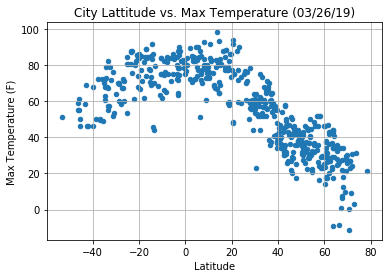

In [91]:
city_weather_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True, figsize=(6,4),
              title="City Lattitude vs. Max Temperature (03/26/19)")
plt.show()

#### Latitude vs. Humidity Plot

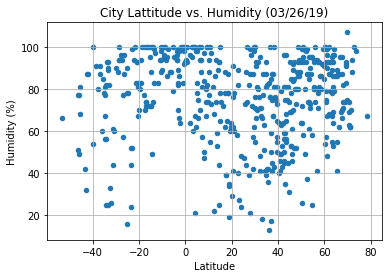

In [90]:
city_weather_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True, figsize=(6,4),
              title="City Lattitude vs. Humidity (03/26/19)")
plt.show()

#### Latitude vs. Cloudiness Plot

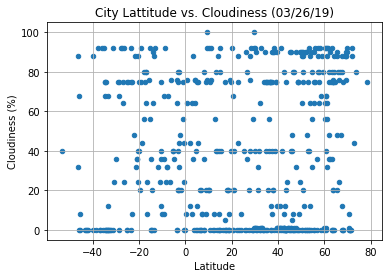

In [89]:
city_weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True, figsize=(6,4),
              title="City Lattitude vs. Cloudiness (03/26/19)")
plt.show()

#### Latitude vs. Wind Speed Plot

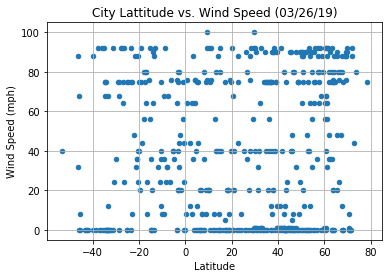

In [92]:
city_weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True, figsize=(6,4),
              title="City Lattitude vs. Wind Speed (03/26/19)")
plt.show()